In [9]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy as np
from sklearn.linear_model import Ridge, LinearRegression, Lasso, RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.svm import SVR
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
%matplotlib inline
# plt.style.use("ggplot")
sns.set_style("darkgrid")

In [11]:
data = pd.read_csv("../clean_data/FinalData_for_Models.csv")

In [12]:
data.rename(columns={'Unnamed: 0':'pickup_time'}, inplace=True)

In [13]:
data.head()

,pickup_time,num_pickups,num_passengers,missing_dt,temp,temp_min,temp_max,humidity,wind_speed,weather_main,weather_description,Passengers,Month,Hour,Day,holiday,precip_in
0,2014-01-01 00:00:00-05:00,107.0,210.0,False,269.27,267.59,270.93,80.0,3.0,clear,sky is clear,108.0,1,0,2,True,0.0
1,2014-01-01 01:00:00-05:00,34.0,45.0,False,268.90,267.04,270.93,80.0,2.0,clear,sky is clear,0.0,1,1,2,True,0.0
2,2014-01-01 02:00:00-05:00,34.0,70.0,False,268.48,266.48,270.37,57.0,3.0,clear,sky is clear,0.0,1,2,2,True,0.0
3,2014-01-01 03:00:00-05:00,12.0,18.0,False,268.33,265.93,270.37,80.0,3.0,clear,sky is clear,0.0,1,3,2,True,0.0
4,2014-01-01 04:00:00-05:00,25.0,37.0,False,268.10,265.37,270.37,80.0,3.0,clear,sky is clear,0.0,1,4,2,True,0.0


In [14]:
data = data.loc[data['missing_dt'] == False, :]

In [15]:
data.head()

,pickup_time,num_pickups,num_passengers,missing_dt,temp,temp_min,temp_max,humidity,wind_speed,weather_main,weather_description,Passengers,Month,Hour,Day,holiday,precip_in
0,2014-01-01 00:00:00-05:00,107.0,210.0,False,269.27,267.59,270.93,80.0,3.0,clear,sky is clear,108.0,1,0,2,True,0.0
1,2014-01-01 01:00:00-05:00,34.0,45.0,False,268.90,267.04,270.93,80.0,2.0,clear,sky is clear,0.0,1,1,2,True,0.0
2,2014-01-01 02:00:00-05:00,34.0,70.0,False,268.48,266.48,270.37,57.0,3.0,clear,sky is clear,0.0,1,2,2,True,0.0
3,2014-01-01 03:00:00-05:00,12.0,18.0,False,268.33,265.93,270.37,80.0,3.0,clear,sky is clear,0.0,1,3,2,True,0.0
4,2014-01-01 04:00:00-05:00,25.0,37.0,False,268.10,265.37,270.37,80.0,3.0,clear,sky is clear,0.0,1,4,2,True,0.0


In [16]:
data.loc[data['Passengers'].isnull()]

,pickup_time,num_pickups,num_passengers,missing_dt,temp,temp_min,temp_max,humidity,wind_speed,weather_main,weather_description,Passengers,Month,Hour,Day,holiday,precip_in


In [17]:
data.head()

,pickup_time,num_pickups,num_passengers,missing_dt,temp,temp_min,temp_max,humidity,wind_speed,weather_main,weather_description,Passengers,Month,Hour,Day,holiday,precip_in
0,2014-01-01 00:00:00-05:00,107.0,210.0,False,269.27,267.59,270.93,80.0,3.0,clear,sky is clear,108.0,1,0,2,True,0.0
1,2014-01-01 01:00:00-05:00,34.0,45.0,False,268.90,267.04,270.93,80.0,2.0,clear,sky is clear,0.0,1,1,2,True,0.0
2,2014-01-01 02:00:00-05:00,34.0,70.0,False,268.48,266.48,270.37,57.0,3.0,clear,sky is clear,0.0,1,2,2,True,0.0
3,2014-01-01 03:00:00-05:00,12.0,18.0,False,268.33,265.93,270.37,80.0,3.0,clear,sky is clear,0.0,1,3,2,True,0.0
4,2014-01-01 04:00:00-05:00,25.0,37.0,False,268.10,265.37,270.37,80.0,3.0,clear,sky is clear,0.0,1,4,2,True,0.0


In [18]:
data.shape

(26230, 17)

In [19]:
data.weather_main.unique()

array(['clear', 'snow', 'fog', 'snow,fog', 'rain,fog,snow', 'rain,snow',
       'rain', 'rain,fog', 'clouds,clear', 'clouds', 'rain,clear',
       'clouds,snow', 'clouds,snow,fog', 'clouds,fog,snow', 'clouds,fog',
       'clouds,rain,fog', 'clouds,rain,thunderstorm,fog', 'clouds,rain',
       'clear,fog', 'rain,thunderstorm,fog', 'rain,thunderstorm',
       'thunderstorm,fog', 'thunderstorm,rain', 'thunderstorm',
       'thunderstorm,rain,fog', 'clouds,thunderstorm,fog',
       'rain,clear,fog', 'clear,clouds,rain', 'clouds,rain,clear',
       'clouds,clear,fog', 'snow,rain,fog', 'snow,thunderstorm,fog',
       'thunderstorm,rain,fog,snow'], dtype=object)

## Feature Extraction:



 ### Holiday Feature

In [20]:
data['holiday'] = data['holiday'].astype(int)

In [21]:
data.head(2)

,pickup_time,num_pickups,num_passengers,missing_dt,temp,temp_min,temp_max,humidity,wind_speed,weather_main,weather_description,Passengers,Month,Hour,Day,holiday,precip_in
0,2014-01-01 00:00:00-05:00,107.0,210.0,False,269.27,267.59,270.93,80.0,3.0,clear,sky is clear,108.0,1,0,2,1,0.0
1,2014-01-01 01:00:00-05:00,34.0,45.0,False,268.90,267.04,270.93,80.0,2.0,clear,sky is clear,0.0,1,1,2,1,0.0


### Time Feature

In [22]:
data.rename(columns={'Hour':'HourOfDay'}, inplace=True)
data.rename(columns={'Day':'DayOfWeek'}, inplace=True)

In [23]:
data.head(2)

,pickup_time,num_pickups,num_passengers,missing_dt,temp,temp_min,temp_max,humidity,wind_speed,weather_main,weather_description,Passengers,Month,HourOfDay,DayOfWeek,holiday,precip_in
0,2014-01-01 00:00:00-05:00,107.0,210.0,False,269.27,267.59,270.93,80.0,3.0,clear,sky is clear,108.0,1,0,2,1,0.0
1,2014-01-01 01:00:00-05:00,34.0,45.0,False,268.90,267.04,270.93,80.0,2.0,clear,sky is clear,0.0,1,1,2,1,0.0


### Weather Feature 

In [24]:
# snow = data[data["weather_main"]=="Snow"]
# df_snow = pd.get_dummies(snow['weather_description'])
# df_snow.head(10)

In [25]:
temp = data.groupby("weather_main")["num_pickups"].sum()

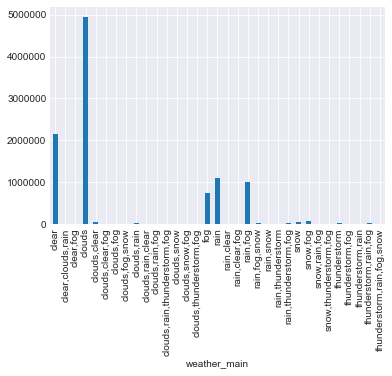

In [26]:
temp.plot(kind="bar")
plt.show()

In [27]:
# data.weather_description.unique()

In [28]:
# data = data.replace({'weather_description' : {'Sky is Clear': 'Clear', 'moderate rain': 'medium rain','sky is clear': 'Clear', 'fog': 'haze', 'heavy intensity rain': 'heavy rain', 
#  'smoke':'haze', 'mist':'haze','light intensity drizzle': 'light rain', 'overcast clouds': 'haze', 
#  'broken clouds': 'heavy rain','scattered clouds': 'Clear', 'snow': 'medium snow', 'few clouds': 'haze', 
#                                        'very heavy rain': 'heavy rain', 'thunderstorm': 'light rain', 'dust': 'haze',
# 'thunderstorm with light rain': 'light rain', 'thunderstorm with heavy rain': 'heavy rain',
# 'thunderstorm with rain': 'medium rain', 'proximity thunderstorm':'Clear','light rain and snow': 'light snow', 
# 'freezing rain': 'heavy rain', 'drizzle': 'light rain','heavy intensity drizzle': 'medium rain', 
# 'shower rain': 'medium rain','light intensity shower rain': 'light rain'}})

In [29]:
# data.weather_description.unique()

In [30]:
column = data.weather_main.astype('category')
weather_column_encoded = column.cat.codes
weather_column_encoded = pd.DataFrame(weather_column_encoded, columns=['weather_encoded'])

In [31]:
data = data.merge(weather_column_encoded, left_index=True, right_index=True)

In [32]:
data.head()

,pickup_time,num_pickups,num_passengers,missing_dt,temp,temp_min,temp_max,humidity,wind_speed,weather_main,weather_description,Passengers,Month,HourOfDay,DayOfWeek,holiday,precip_in,weather_encoded
0,2014-01-01 00:00:00-05:00,107.0,210.0,False,269.27,267.59,270.93,80.0,3.0,clear,sky is clear,108.0,1,0,2,1,0.0,0
1,2014-01-01 01:00:00-05:00,34.0,45.0,False,268.90,267.04,270.93,80.0,2.0,clear,sky is clear,0.0,1,1,2,1,0.0,0
2,2014-01-01 02:00:00-05:00,34.0,70.0,False,268.48,266.48,270.37,57.0,3.0,clear,sky is clear,0.0,1,2,2,1,0.0,0
3,2014-01-01 03:00:00-05:00,12.0,18.0,False,268.33,265.93,270.37,80.0,3.0,clear,sky is clear,0.0,1,3,2,1,0.0,0
4,2014-01-01 04:00:00-05:00,25.0,37.0,False,268.10,265.37,270.37,80.0,3.0,clear,sky is clear,0.0,1,4,2,1,0.0,0


In [33]:
data.weather_encoded.unique()

array([ 0, 24, 15, 25, 20, 21, 16, 19,  4,  3, 17, 12, 13,  7,  6, 10, 11,
        8,  2, 23, 22, 29, 30, 28, 31, 14, 18,  1,  9,  5, 26, 27, 32])

### DayOfWeek + Weather Encoded

In [34]:
data["DayofWeek_WeatherEncoded"]=data[['DayOfWeek','weather_encoded']].apply(lambda x: '_'.join(str(i) for i in x), axis=1)

### DayOfWeek + HourOfDay

In [35]:
data["DayofWeek_HourOfDay"]=data[['DayOfWeek','HourOfDay']].apply(lambda x: '_'.join(str(i) for i in x), axis=1)

### DayOfWeek + HourOfDay + Holiday

In [36]:
data["DayofWeek_HourOfDay_Holiday"]=data[['DayOfWeek','HourOfDay', 'holiday']].apply(lambda x: '_'.join(str(i) for i in x), axis=1)

### HourOfDay + PassengersArriving

In [37]:
#data["DayofWeek_Passengers"]=data[['DayOfWeek','Passengers']].apply(lambda x: '_'.join(str(i) for i in x), axis=1)

### Adding previous hours info

In [38]:
data["prev_hour_passengers"] = data['Passengers'].shift(1)
data["prev_2_hour_passengers"] = data['Passengers'].shift(2)

In [39]:
#data["DayofWeek_Passengers_prev"]=data[['DayOfWeek','prev_hour_passengers']].apply(lambda x: '_'.join(str(i) for i in x), axis=1)
#data["DayofWeek_Passengers_prev2"]=data[['DayOfWeek','prev_2_hour_passengers']].apply(lambda x: '_'.join(str(i) for i in x), axis=1)

In [40]:
data.drop(data['prev_2_hour_passengers'].isnull(), inplace=True)

In [41]:
data.head()

,pickup_time,num_pickups,num_passengers,missing_dt,temp,temp_min,temp_max,humidity,wind_speed,weather_main,...,HourOfDay,DayOfWeek,holiday,precip_in,weather_encoded,DayofWeek_WeatherEncoded,DayofWeek_HourOfDay,DayofWeek_HourOfDay_Holiday,prev_hour_passengers,prev_2_hour_passengers
2,2014-01-01 02:00:00-05:00,34.0,70.0,False,268.48,266.48,270.37,57.0,3.0,clear,...,2,2,1,0.0,0,2_0,2_2,2_2_1,0.0,108.0
3,2014-01-01 03:00:00-05:00,12.0,18.0,False,268.33,265.93,270.37,80.0,3.0,clear,...,3,2,1,0.0,0,2_0,2_3,2_3_1,0.0,0.0
4,2014-01-01 04:00:00-05:00,25.0,37.0,False,268.10,265.37,270.37,80.0,3.0,clear,...,4,2,1,0.0,0,2_0,2_4,2_4_1,0.0,0.0
5,2014-01-01 05:00:00-05:00,16.0,24.0,False,268.02,265.37,270.37,80.0,1.0,clear,...,5,2,1,0.0,0,2_0,2_5,2_5_1,0.0,0.0
6,2014-01-01 06:00:00-05:00,14.0,17.0,False,267.90,265.37,270.37,80.0,1.0,clear,...,6,2,1,0.0,0,2_0,2_6,2_6_1,243.0,0.0


In [42]:
data.columns

Index(['pickup_time', 'num_pickups', 'num_passengers', 'missing_dt', 'temp',
       'temp_min', 'temp_max', 'humidity', 'wind_speed', 'weather_main',
       'weather_description', 'Passengers', 'Month', 'HourOfDay', 'DayOfWeek',
       'holiday', 'precip_in', 'weather_encoded', 'DayofWeek_WeatherEncoded',
       'DayofWeek_HourOfDay', 'DayofWeek_HourOfDay_Holiday',
       'prev_hour_passengers', 'prev_2_hour_passengers'],
      dtype='object')

In [43]:
final_data = data.drop(['num_passengers', 'temp_min', 'temp_max', 'humidity', 'wind_speed', 
            'pickup_time', 'missing_dt'],axis=1)

In [44]:
final_data.columns

Index(['num_pickups', 'temp', 'weather_main', 'weather_description',
       'Passengers', 'Month', 'HourOfDay', 'DayOfWeek', 'holiday', 'precip_in',
       'weather_encoded', 'DayofWeek_WeatherEncoded', 'DayofWeek_HourOfDay',
       'DayofWeek_HourOfDay_Holiday', 'prev_hour_passengers',
       'prev_2_hour_passengers'],
      dtype='object')

In [45]:
categorical_vars = final_data.describe(include=["object"]).columns
continuous_vars = final_data.describe().columns

In [46]:
categorical_vars

Index(['weather_main', 'weather_description', 'DayofWeek_WeatherEncoded',
       'DayofWeek_HourOfDay', 'DayofWeek_HourOfDay_Holiday'],
      dtype='object')

In [47]:
continuous_vars

Index(['num_pickups', 'temp', 'Passengers', 'Month', 'HourOfDay', 'DayOfWeek',
       'holiday', 'precip_in', 'weather_encoded', 'prev_hour_passengers',
       'prev_2_hour_passengers'],
      dtype='object')

## Correlation:

In [48]:
final_data.columns

Index(['num_pickups', 'temp', 'weather_main', 'weather_description',
       'Passengers', 'Month', 'HourOfDay', 'DayOfWeek', 'holiday', 'precip_in',
       'weather_encoded', 'DayofWeek_WeatherEncoded', 'DayofWeek_HourOfDay',
       'DayofWeek_HourOfDay_Holiday', 'prev_hour_passengers',
       'prev_2_hour_passengers'],
      dtype='object')

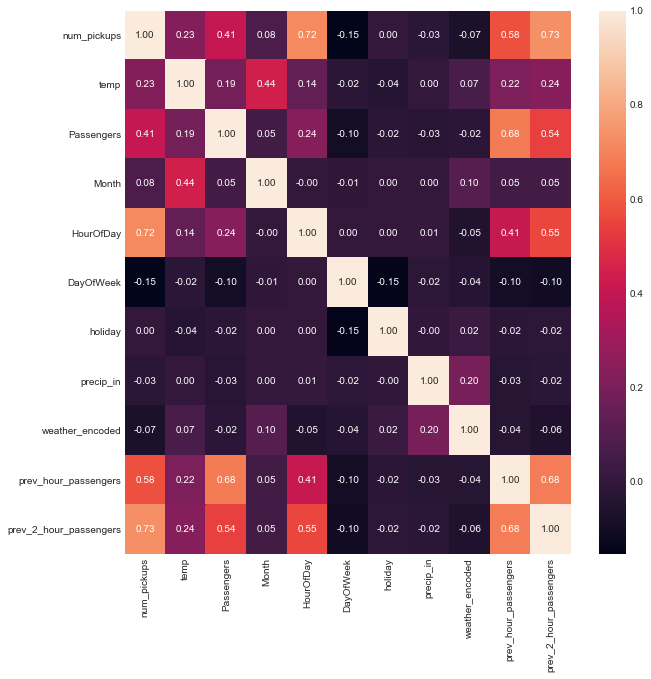

In [49]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(final_data[continuous_vars].corr(),
           annot=True, fmt=".2f")

In [50]:
data_dummies_df = pd.get_dummies(final_data, columns=categorical_vars, drop_first=True)

In [51]:
num_pickups = data_dummies_df.num_pickups
data_dummies_df.drop("num_pickups", axis=1, inplace=True)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(data_dummies_df, num_pickups, random_state=0, test_size=0.2)

### Plotting error functions

In [53]:
def get_predictions(X_train, y_train, X_test, classifier):
    classifier.fit(X_train, y_train)
    return classifier.predict(X_test)

In [54]:
def plot_errors_hour(data, predictions, y_test):
    test_hours = data['HourOfDay'].loc[y_test.index]
    errors_df = pd.DataFrame({'HourOfDay' : test_hours, 'y_test' : y_test, 'predictions' : predictions})
    errors_df['error'] = errors_df.predictions - errors_df.y_test
    errors_df['error frac'] = errors_df.error / errors_df.y_test
    errors_df_hourly = errors_df.groupby('HourOfDay').agg({'error' : 'mean', 'error frac' : 'mean'})
    errors_df_hourly.plot(kind = 'bar')
    return errors_df_hourly

### Pipeline Ridge

In [53]:
ridge_pipe = make_pipeline(RobustScaler(), VarianceThreshold(), Ridge())
ridge_params = {'ridge__alpha' : [0.01, 0.1, 1.0, 10.0, 100.0, np.log(14)]}

In [54]:
ridge_grid = GridSearchCV(ridge_pipe, ridge_params, cv=3, scoring='r2')

In [55]:
ridge_grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('variancethreshold', VarianceThreshold(threshold=0.0)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'ridge__alpha': [0.01, 0.1, 1.0, 10.0, 100.0, 2.6390573296152584]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=0)

In [ ]:
ridge_grid.best_params_
#alpha = 1.0

In [55]:
ridge = Ridge(alpha = 1.0)

In [56]:
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [57]:
ridge.score(X_test, y_test)

0.86518408378015987

,error,error frac
HourOfDay,,
0,3.256119,1.137179
1,-37.762596,12.907092
2,-9.105007,36.979965
3,-36.855928,34.757310
4,12.124674,8.823015
5,-4.125772,inf
6,0.094664,NaN
7,7.169178,NaN
8,21.137490,NaN


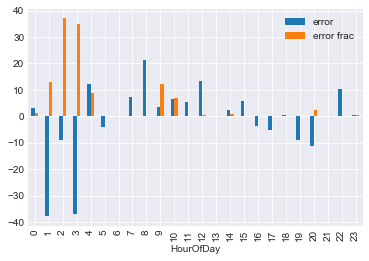

In [47]:
plot_errors_hour(data, get_predictions(X_train, y_train, X_test, Ridge(alpha = 1.0)), y_test)

### Pipeline SVR

Takes way longer and it doesn't do great (only 0.6642 R^2)

In [337]:
svr_pipe = make_pipeline(RobustScaler(), VarianceThreshold(), SVR())
svr_params = {'svr__kernel' : ['linear', 'rbf', 'sigmoid'],
             'svr__C' : [1.0, 10.0, 100.0],
             'svr__epsilon' : [0.01, 0.05, 0.1, 0.5]}
svr_grid = GridSearchCV(svr_pipe, svr_params, cv=3, scoring='r2', verbose=2, n_jobs=-1)

In [338]:
svr_grid.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] svr__C=1.0, svr__epsilon=0.01, svr__kernel=linear ...............
[CV] svr__C=1.0, svr__epsilon=0.01, svr__kernel=linear ...............
[CV] svr__C=1.0, svr__epsilon=0.01, svr__kernel=linear ...............
[CV] svr__C=1.0, svr__epsilon=0.01, svr__kernel=rbf ..................
[CV]  svr__C=1.0, svr__epsilon=0.01, svr__kernel=linear, total= 3.6min
[CV] svr__C=1.0, svr__epsilon=0.01, svr__kernel=rbf ..................
[CV]  svr__C=1.0, svr__epsilon=0.01, svr__kernel=linear, total= 3.6min
[CV] svr__C=1.0, svr__epsilon=0.01, svr__kernel=rbf ..................
[CV]  svr__C=1.0, svr__epsilon=0.01, svr__kernel=linear, total= 3.6min
[CV] svr__C=1.0, svr__epsilon=0.01, svr__kernel=sigmoid ..............
[CV] ... svr__C=1.0, svr__epsilon=0.01, svr__kernel=rbf, total= 3.9min
[CV] svr__C=1.0, svr__epsilon=0.01, svr__kernel=sigmoid ..............
[CV]  svr__C=1.0, svr__epsilon=0.01, svr__kernel=sigmoid, total= 3.5min
[CV] svr__C=1.

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 52.8min


[CV]  svr__C=1.0, svr__epsilon=0.5, svr__kernel=sigmoid, total= 3.8min
[CV] svr__C=10.0, svr__epsilon=0.01, svr__kernel=linear ..............
[CV]  svr__C=1.0, svr__epsilon=0.5, svr__kernel=sigmoid, total= 3.8min
[CV] svr__C=10.0, svr__epsilon=0.01, svr__kernel=linear ..............
[CV]  svr__C=1.0, svr__epsilon=0.5, svr__kernel=sigmoid, total= 3.8min
[CV] svr__C=10.0, svr__epsilon=0.01, svr__kernel=rbf .................
[CV]  svr__C=10.0, svr__epsilon=0.01, svr__kernel=linear, total= 3.6min
[CV] svr__C=10.0, svr__epsilon=0.01, svr__kernel=rbf .................
[CV]  svr__C=10.0, svr__epsilon=0.01, svr__kernel=linear, total= 3.6min
[CV] svr__C=10.0, svr__epsilon=0.01, svr__kernel=rbf .................
[CV]  svr__C=10.0, svr__epsilon=0.01, svr__kernel=linear, total= 3.5min
[CV] svr__C=10.0, svr__epsilon=0.01, svr__kernel=sigmoid .............
[CV] .. svr__C=10.0, svr__epsilon=0.01, svr__kernel=rbf, total= 3.9min
[CV] svr__C=10.0, svr__epsilon=0.01, svr__kernel=sigmoid .............
[CV

[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed: 160.0min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('variancethreshold', VarianceThreshold(threshold=0.0)), ('svr', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'svr__kernel': ['linear', 'rbf', 'sigmoid'], 'svr__C': [1.0, 10.0, 100.0], 'svr__epsilon': [0.01, 0.05, 0.1, 0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=2)

In [340]:
svr_grid.score(X_test, y_test)

0.6642188611968457

In [341]:
svr_grid.best_params_
#C = 100, epsilon = 0.5, kernel = 'linear'

{'svr__C': 100.0, 'svr__epsilon': 0.5, 'svr__kernel': 'linear'}

In [ ]:
plot_errors_hour(data, get_predictions(X_train, y_train, X_test, SVR(
        C = 100.0,
        epsilon = 0.5,
        kernel = 'linear')), y_test)

### Pipeline RF

In [69]:
rf_pipe = make_pipeline(RobustScaler(), VarianceThreshold(), RandomForestRegressor(n_jobs=-1))
rf_params = {'randomforestregressor__n_estimators' : [10, 50, 100],
             'randomforestregressor__max_features' : [3, 6, 10, 'auto'],
             'randomforestregressor__max_depth' : [5, 10, None]}
rf_grid = GridSearchCV(rf_pipe, rf_params, cv=3, scoring='r2')

In [70]:
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('variancethreshold', VarianceThreshold(threshold=0.0)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_featu...imators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'randomforestregressor__n_estimators': [10, 50, 100], 'randomforestregressor__max_features': [3, 6, 10, 'auto'], 'randomforestregressor__max_depth': [5, 10, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=0)

In [73]:
rf_grid.score(X_test, y_test)

0.76915546151153791

In [333]:
rf_grid.best_params_
#max_depth = None, max_features = 'auto', n_estimators = 100

{'randomforestregressor__max_depth': None,
 'randomforestregressor__max_features': 'auto',
 'randomforestregressor__n_estimators': 100}

,error,error frac
HourOfDay,,
0,25.320931,0.689082
1,-18.247832,7.330749
2,-9.427580,27.167766
3,-41.793935,16.521189
4,7.786270,5.220199
5,-3.152386,inf
6,9.128520,inf
7,8.114178,inf
8,13.843652,inf


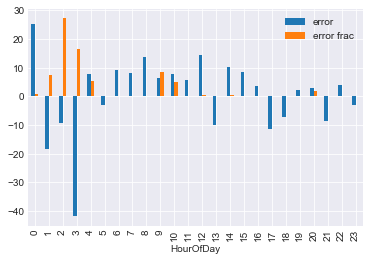

In [48]:
plot_errors_hour(data, get_predictions(X_train, y_train, X_test, RandomForestRegressor(
        max_depth = None,
        max_features = 'auto',
        n_estimators = 100)), y_test)

### GBT

In [142]:
gbt_pipe = make_pipeline(RobustScaler(), VarianceThreshold(), GradientBoostingRegressor(random_state=0))
gbt_params = {'gradientboostingregressor__n_estimators' : [50, 100, 200],
              'gradientboostingregressor__max_features' : [3, 6, 'auto'],
#              'gradientboostingregressor__subsample' : [0.2, 0.5, 1.0],
              'gradientboostingregressor__max_depth' : [3, 5, 7],
              'gradientboostingregressor__init' : [None]}
gbt_grid = GridSearchCV(gbt_pipe, gbt_params, cv=3, scoring='r2', verbose=3)

In [143]:
start = time.time()
gbt_grid.fit(X_train, y_train)
time.time() - start

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] gradientboostingregressor__init=None, gradientboostingregressor__max_depth=3, gradientboostingregressor__max_features=3, gradientboostingregressor__n_estimators=50 
[CV]  gradientboostingregressor__init=None, gradientboostingregressor__max_depth=3, gradientboostingregressor__max_features=3, gradientboostingregressor__n_estimators=50, score=0.22039883202427868, total=   1.1s
[CV] gradientboostingregressor__init=None, gradientboostingregressor__max_depth=3, gradientboostingregressor__max_features=3, gradientboostingregressor__n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  gradientboostingregressor__init=None, gradientboostingregressor__max_depth=3, gradientboostingregressor__max_features=3, gradientboostingregressor__n_estimators=50, score=0.22946544199693975, total=   0.9s
[CV] gradientboostingregressor__init=None, gradientboostingregressor__max_depth=3, gradientboostingregressor__max_features=3, gradientboostingregressor__n_estimators=50 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


[CV]  gradientboostingregressor__init=None, gradientboostingregressor__max_depth=3, gradientboostingregressor__max_features=3, gradientboostingregressor__n_estimators=50, score=0.2206955183159618, total=   0.9s
[CV] gradientboostingregressor__init=None, gradientboostingregressor__max_depth=3, gradientboostingregressor__max_features=3, gradientboostingregressor__n_estimators=100 
[CV]  gradientboostingregressor__init=None, gradientboostingregressor__max_depth=3, gradientboostingregressor__max_features=3, gradientboostingregressor__n_estimators=100, score=0.49002167917454553, total=   1.0s
[CV] gradientboostingregressor__init=None, gradientboostingregressor__max_depth=3, gradientboostingregressor__max_features=3, gradientboostingregressor__n_estimators=100 
[CV]  gradientboostingregressor__init=None, gradientboostingregressor__max_depth=3, gradientboostingregressor__max_features=3, gradientboostingregressor__n_estimators=100, score=0.4979056045585144, total=   1.3s
[CV] gradientboostingr

[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed: 13.8min finished


862.6728050708771

In [146]:
gbt_grid.score(X_test, y_test)

0.76331350668818299

In [335]:
gbt_grid.best_params_
#init = None, max_depther = 7, max_features = 'auto', n_estimators = 50

{'gradientboostingregressor__init': None,
 'gradientboostingregressor__max_depth': 7,
 'gradientboostingregressor__max_features': 'auto',
 'gradientboostingregressor__n_estimators': 50}

,error,error frac
HourOfDay,,
0,29.700086,0.707911
1,-16.854285,7.444019
2,-10.696975,26.968652
3,-42.805410,16.344273
4,7.706196,5.326479
5,-3.107671,inf
6,10.545493,inf
7,9.476356,inf
8,13.539174,inf


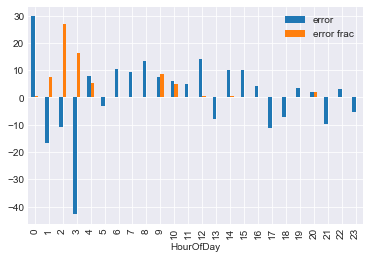

In [345]:
plot_errors_hour(data, get_predictions(X_train, y_train, X_test, GradientBoostingRegressor(
        max_depth = 7,
        max_features = 'auto',
        n_estimators = 50)), y_test)

In [273]:
class ridge_compatability:
    def __init__(self, est):
        self.est = est
    def predict(self, X):
        return self.est.predict(X).reshape(-1,1)
    def fit(self, X, y=None, sample_weights = None):
        return self.est.fit(X, y)
ridge = Ridge()
base_estimator = ridge_compatability(ridge)

In [274]:
gbt2_pipe = make_pipeline(RobustScaler(), VarianceThreshold(), GradientBoostingRegressor(random_state=0))
gbt2_params = {'gradientboostingregressor__n_estimators' : [50, 100, 200],
              'gradientboostingregressor__max_features' : [3, 6, 'auto'],
#              'gradientboostingregressor__subsample' : [0.2, 0.5, 1.0],
              'gradientboostingregressor__max_depth' : [3, 5, 7],
              'gradientboostingregressor__init' : [base_estimator]}
gbt2_grid = GridSearchCV(gbt2_pipe, gbt2_params, cv=3, scoring='r2', verbose=2)

In [275]:
gbt2_grid.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] gradientboostingregressor__init=<__main__.ridge_compatability object at 0x123fdfef0>, gradientboostingregressor__max_depth=3, gradientboostingregressor__max_features=3, gradientboostingregressor__n_estimators=50 
[CV]  gradientboostingregressor__init=<__main__.ridge_compatability object at 0x123fdfef0>, gradientboostingregressor__max_depth=3, gradientboostingregressor__max_features=3, gradientboostingregressor__n_estimators=50, total=   1.4s
[CV] gradientboostingregressor__init=<__main__.ridge_compatability object at 0x123fdfef0>, gradientboostingregressor__max_depth=3, gradientboostingregressor__max_features=3, gradientboostingregressor__n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV]  gradientboostingregressor__init=<__main__.ridge_compatability object at 0x123fdfef0>, gradientboostingregressor__max_depth=3, gradientboostingregressor__max_features=3, gradientboostingregressor__n_estimators=50, total=   1.0s
[CV] gradientboostingregressor__init=<__main__.ridge_compatability object at 0x123fdfef0>, gradientboostingregressor__max_depth=3, gradientboostingregressor__max_features=3, gradientboostingregressor__n_estimators=50 
[CV]  gradientboostingregressor__init=<__main__.ridge_compatability object at 0x123fdfef0>, gradientboostingregressor__max_depth=3, gradientboostingregressor__max_features=3, gradientboostingregressor__n_estimators=50, total=   1.1s
[CV] gradientboostingregressor__init=<__main__.ridge_compatability object at 0x123fdfef0>, gradientboostingregressor__max_depth=3, gradientboostingregressor__max_features=3, gradientboostingregressor__n_estimators=100 
[CV]  gradientboostingregressor__init=<__main__.ridge_compatability object at 0x123fdfef0>, gradi

[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed: 15.8min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('variancethreshold', VarianceThreshold(threshold=0.0)), ('gradientboostingregressor', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             ...tors=100, presort='auto', random_state=0,
             subsample=1.0, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'gradientboostingregressor__n_estimators': [50, 100, 200], 'gradientboostingregressor__max_features': [3, 6, 'auto'], 'gradientboostingregressor__max_depth': [3, 5, 7], 'gradientboostingregressor__init': [<__main__.ridge_compatability object at 0x123fdfef0>]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=2)

In [278]:
gbt2_grid.score(X_test, y_test)

0.76254532855935075

In [336]:
gbt2_grid.best_params_
#max_depth = 7, max_features = 'auto', n_estimators = 100

{'gradientboostingregressor__init': <__main__.ridge_compatability at 0x123fdfef0>,
 'gradientboostingregressor__max_depth': 7,
 'gradientboostingregressor__max_features': 'auto',
 'gradientboostingregressor__n_estimators': 100}

,error,error frac
HourOfDay,,
0,29.700086,0.707911
1,-16.854285,7.444019
2,-10.696975,26.968652
3,-42.805410,16.344273
4,7.706196,5.326479
5,-3.107671,inf
6,10.545493,inf
7,9.476356,inf
8,13.539174,inf


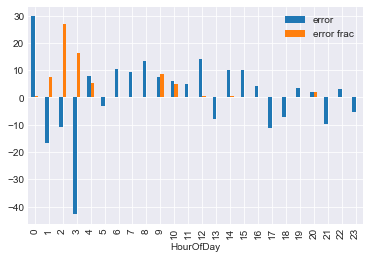

In [343]:
plot_errors_hour(data, get_predictions(X_train, y_train, X_test, GradientBoostingRegressor(
        max_depth = 7,
        max_features = 'auto',
        n_estimators = 100,
        init = ridge_compatability(Ridge()))), y_test)

## XGBoost

Never got this to work

In [ ]:
from xgboost import XGBClassifier
modelXGB = XGBClassifier()
modelXGB.fit(X_train, y_train)
scoreXGB = modelXGB.score(X_test, y_test)
print(scoreXGB)